# RESULTS OVERVIEW

Contents

- 1 General Soil Characteristics
    - 1.1 Soil Texture
    - 1.2 Bulk Density
    - 1.3 pH
    - 1.4 Electrical Conductivity

- 2 Soil Inorganic Contaminants
    - 2.1 Arsenic
    - 2.2 Barium
    - 2.3 Cadmium
    - 2.4 Chromium (total)
    - 2.5 Cobalt
    - 2.6 Copper
    - 2.7 Lead
    - 2.8 Manganese
    - 2.9 Nickel
    - 2.10 Strontium
    - 2.11 Zinc

# Imports & settings

In [77]:
import pandas as pd
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Patch
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300

PROJECT_ROOT = '../'
data_path = os.path.join(PROJECT_ROOT, 'data_hmq/data_dict.pkl')
with open(data_path, "rb") as f:
    data_dict = pickle.load(f)

OUT_DIR = r"../Result_hmq/Ch06_Figures"
os.makedirs(OUT_DIR, exist_ok=True)

# 1.1 Soil Texture

In [78]:
year = "Soil quality data 2025"
df_Physical = data_dict[year]["PHPhysical"].copy()

df_Physical = df_Physical[(df_Physical["PHUID"] == 1) & (df_Physical["PHSampleUID"] == 1)]

regions = ["Abu Dhabi", "Al Ain", "Al Dhafra"]
result_SoilTexture = {}

for region in regions:
    sub = df_Physical[df_Physical["Location"] == region]

    clay = sub.iloc[:, -5].sum()
    silt = sub.iloc[:, -4].sum()
    sand = sub.iloc[:, -3].sum()

    total = clay + silt + sand

    result_SoilTexture[region] = {
        "clay": clay / total if total != 0 else None,
        "sand": sand / total if total != 0 else None,
        "silt": silt / total if total != 0 else None,
    }
ratio_df_SoilTexture = pd.DataFrame.from_dict(result_SoilTexture, orient="index")
# 换算成百分数，小数点保留1位
ratio_df_SoilTexture = (ratio_df_SoilTexture * 100).round(1)
print(ratio_df_SoilTexture)

           clay  sand  silt
Abu Dhabi   2.0  96.2   1.8
Al Ain      1.4  98.0   0.5
Al Dhafra   2.0  96.9   1.1


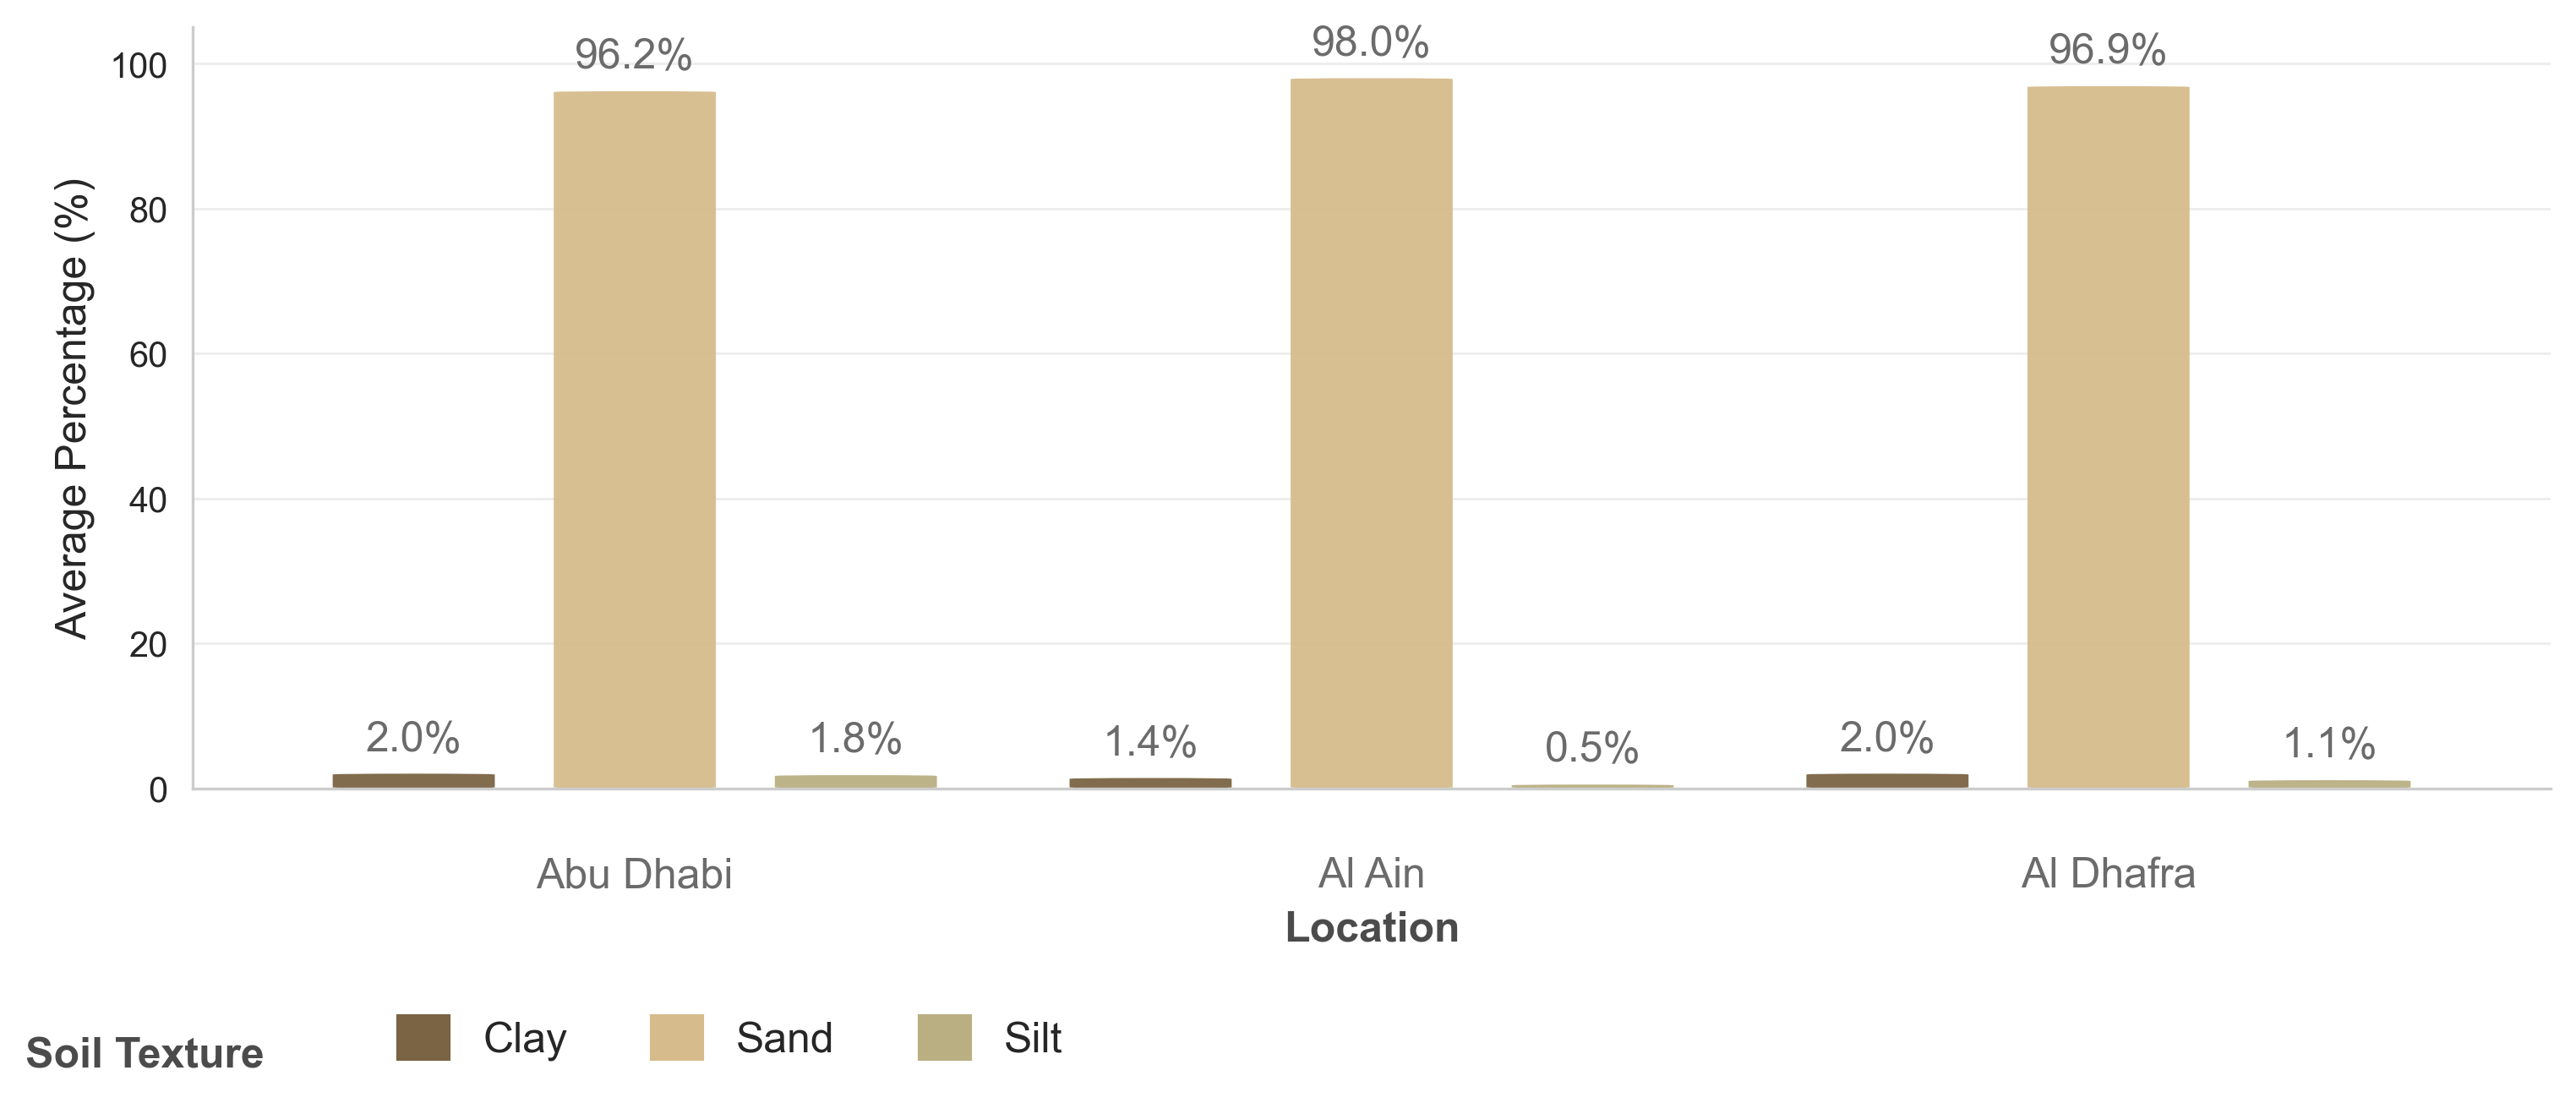

In [79]:
def rounded_bar(ax, x_center, height, width=0.22, bottom=0.0, rounding=0.48, **kwargs):
    """
    圆角柱：rounding 越大越圆（这里用接近示例的“半圆顶”效果）
    """
    x0 = x_center - width / 2
    y0 = bottom
    patch = FancyBboxPatch(
        (x0, y0),
        width,
        height,
        boxstyle=f"round,pad=0,rounding_size={width*rounding}",
        **kwargs
    )
    ax.add_patch(patch)
    return patch

# =========================
# 1) 数据准备
# =========================
regions = list(ratio_df_SoilTexture.index)
textures = ["clay", "sand", "silt"]  # 显示顺序
values = ratio_df_SoilTexture[textures].to_numpy()

x = np.arange(len(regions))
bar_w = 0.22
gap = 0.30
offsets = np.array([-gap, 0.0, gap])

# =========================
# 2) 配色：按示例图风格（棕 / 米黄 / 浅橄榄）
# =========================
colors = {
    "clay": "#7A6443",  # 深棕
    "sand": "#D6BC8C",  # 米黄
    "silt": "#B9AF83",  # 浅橄榄
}
edge = {
    "clay": "#7A6443",
    "sand": "#D6BC8C",  # 示例里 sand 的点点更像深棕点，因此边线用深棕更协调
    "silt": "#B9AF83",
}

# =========================
# 3) 作图
# =========================
fig, ax = plt.subplots(figsize=(12, 5))

for j, tex in enumerate(textures):
    for i, region in enumerate(regions):
        h = float(values[i, j])
        xc = x[i] + offsets[j]

        rounded_bar(
            ax,
            x_center=xc,
            height=h,
            width=bar_w,
            facecolor=colors[tex],
            edgecolor=edge[tex],
            linewidth=0.0,
            alpha=0.95,
        )

        ax.text(xc, h + 2.0, f"{h:.1f}%", ha="center", va="bottom", fontsize=12, color="#6B6B6B")

# =========================
# 4) 轴样式（更接近示例）
# =========================
ax.set_xlim(-0.6, len(regions) - 1 + 0.6)
ax.set_ylim(0, 105)
ax.set_xticks(x)
ax.set_xticklabels(regions, fontsize=12, color="#6B6B6B")
ax.tick_params(axis="x", pad=16)

ax.set_ylabel("Average Percentage (%)", fontsize=12)
ax.set_xlabel("Location", fontsize=12, fontweight="bold", color="#4B4B4B")

ax.yaxis.grid(True, linestyle="-", linewidth=0.7, alpha=0.35)
ax.xaxis.grid(False)
ax.set_axisbelow(True)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# =========================
# 5) Legend：位置修正（图外底部一行，左侧对齐）
#    模拟示例：左侧 "Soil Texture" 文本 + 右侧 legend items
# =========================
handles = [
    Patch(facecolor=colors["clay"], edgecolor=edge["clay"], label="Clay"),
    Patch(facecolor=colors["sand"], edgecolor=edge["sand"], label="Sand"),
    Patch(facecolor=colors["silt"], edgecolor=edge["silt"], label="Silt"),
]

# 给底部留出足够空间（关键：legend 不会压到图里）
fig.subplots_adjust(bottom=0.28)

# 左侧标题文字（更像示例）
fig.text(0.07, 0.06, "Soil Texture", fontsize=12, fontweight="bold", color="#4B4B4B")

# legend 本体（放在标题右侧）
fig.legend(
    handles=handles,
    loc="lower left",
    bbox_to_anchor=(0.18, 0.035),  # (x, y) 基于 figure 坐标
    ncol=3,
    frameon=False,
    fontsize=12,
    handlelength=1.2,
    handleheight=1.2,
    columnspacing=2.0,
)

plt.show()
fig.savefig(os.path.join(OUT_DIR, "Ch06_SoilTexture.png"), bbox_inches="tight", pad_inches=0.1)
fig.savefig(os.path.join(OUT_DIR, "Ch06_SoilTexture.svg"), bbox_inches="tight", pad_inches=0.1)


# 1.2 Bulk Density

In [80]:
regions = ["Abu Dhabi", "Al Ain", "Al Dhafra"]
result_BulkDensity = {}

for region in regions:
    sub = df_Physical[df_Physical["Location"] == region]

    result_BulkDensity[region] = {
        "Bulk Density (g/cm³)": sub["BULKDENS"].mean(),
    }
result_BulkDensity_df = pd.DataFrame.from_dict(result_BulkDensity, orient="index").round(2)
print(result_BulkDensity_df)

           Bulk Density (g/cm³)
Abu Dhabi                  1.61
Al Ain                     1.64
Al Dhafra                  1.62


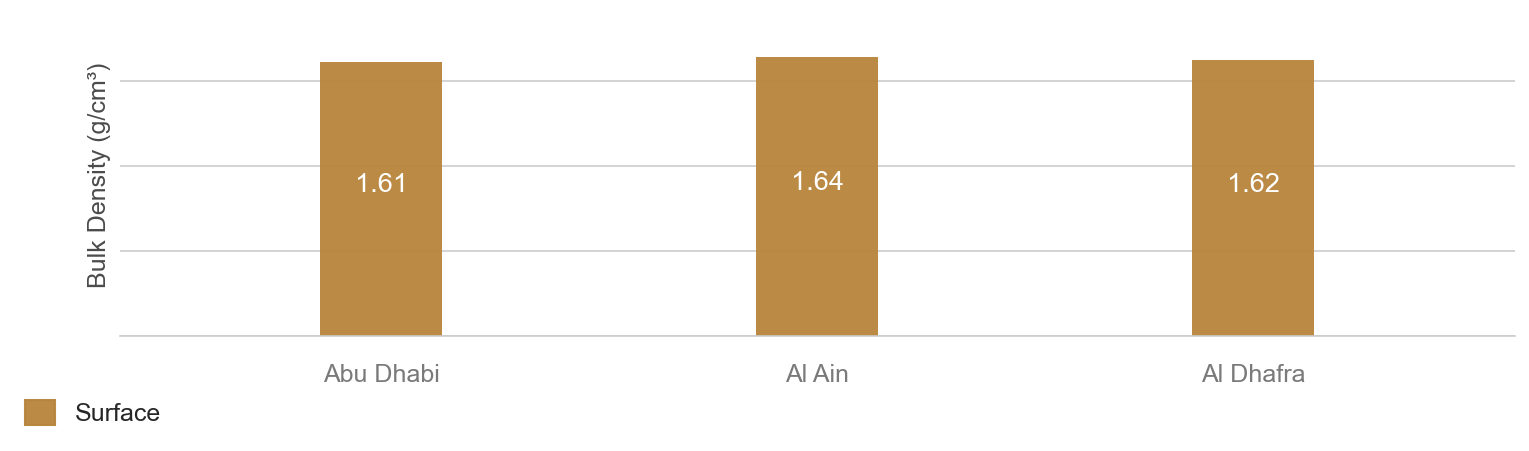

In [81]:
# =========================
# 1) 数据
# =========================
regions = ["Abu Dhabi", "Al Ain", "Al Dhafra"]
col = "Bulk Density (g/cm³)"
vals = result_BulkDensity_df.reindex(regions)[col].to_numpy(dtype=float)

x = np.arange(len(regions))

# =========================
# 2) 画布
# =========================
fig, ax = plt.subplots(figsize=(12, 3.4), dpi=150)

# 颜色（与你示例一致的金棕色）
bar_face = "#B8843B"
bar_edge = "#B8843B"

# =========================
# 3) 平顶柱
# =========================
bars = ax.bar(
    x,
    vals,
    width=0.28,
    color=bar_face,
    edgecolor=bar_edge,
    linewidth=0.0,
    alpha=0.95
)

# 柱内白色数值
for rect, v in zip(bars, vals):
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        v * 0.55,
        f"{v:.2f}",
        ha="center",
        va="center",
        fontsize=13,
        color="white"
    )

# =========================
# 4) 坐标轴 / 网格（贴近示例）
# =========================
ax.set_xlim(-0.6, len(regions) - 1 + 0.6)
ax.set_xticks(x)
ax.set_xticklabels(regions, fontsize=12, color="#7A7A7A")
ax.tick_params(axis="x", pad=10)

ax.set_ylabel("Bulk Density (g/cm³)", fontsize=12, color="#4B4B4B")

# y 轴范围：留顶部空间
ax.set_ylim(0, max(vals) * 1.15)

# 隐藏 y 轴刻度数字（示例里没有显示）
ax.tick_params(axis="y", labelleft=False, length=0)
# ax.tick_params(axis="both", which="both", length=0)

# 去掉多余边框
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
# ax.spines["bottom"].set_visible(False)

# =========================
# 5) Legend（底部左侧）
# =========================
fig.subplots_adjust(bottom=0.25)

handle = Patch(
    facecolor=bar_face,
    edgecolor=bar_edge,
    label="Surface",
    alpha=0.95
)

fig.legend(
    handles=[handle],
    loc="lower left",
    bbox_to_anchor=(0.06, 0.03),
    frameon=False,
    fontsize=12,
    handlelength=1.2,
    handleheight=1.2,
)
ax.xaxis.grid(False)
plt.show()

# 高清导出（建议至少一个）
# plt.savefig("BulkDensity_Surface_2025.png", dpi=600, bbox_inches="tight")
# plt.savefig("BulkDensity_Surface_2025.svg", bbox_inches="tight")
fig.savefig(os.path.join(OUT_DIR, "Ch06_BulkDensity.png"), bbox_inches="tight", pad_inches=0.1)
fig.savefig(os.path.join(OUT_DIR, "Ch06_BulkDensity.svg"), bbox_inches="tight", pad_inches=0.1)

# 1.3 pH

In [82]:
land_use_types = {
    0: "All",
    7: "Agricultural",
    8: "Residential",
    9: "Industrial",
    11: "Non-developed",
}

regions = ["Abu Dhabi", "Al Ain", "Al Dhafra"]
year = "Soil quality data 2025"

df = data_dict[year]["PHChemical"].copy()

# Surface + 目标样品
df = df[(df["PHUID"] == 1) & (df["PHSampleUID"] == 1)]

# 只保留关心的地区（可选）
df = df[df["Location"].isin(regions)]

rows = []

# 循环每种土地类型
for land_id, land_name in land_use_types.items():

    if land_id == 0:
        df_land = df.copy()
    else:
        df_land = df[df["SurveyID"] == land_id]

    # 循环每个地区
    for region in regions:
        sub = df_land[df_land["Location"] == region]
        ph = sub["satph"].dropna()

        n = ph.size
        mean = ph.mean()
        median = ph.median()
        min_val = ph.min()
        max_val = ph.max()
        se = ph.std(ddof=1) / np.sqrt(n) if n > 1 else np.nan

        rows.append({
            "LandUse": land_name,
            "Region": region,
            "Mean ± se": f"{mean:.2f} ± {se:.2f}" if np.isfinite(mean) else "",
            "Median": round(median, 2) if np.isfinite(median) else np.nan,
            "Min": round(min_val, 2) if np.isfinite(min_val) else np.nan,
            "Max": round(max_val, 2) if np.isfinite(max_val) else np.nan,
            "n": int(n),
        })

df_ph_surface = (
    pd.DataFrame(rows)
      .set_index(["LandUse", "Region"])
      .loc[:, ["Mean ± se", "Median", "Min", "Max", "n"]]
)

df_ph_surface


Mean ± se  Median   Min   Max    n
LandUse       Region                                         
All           Abu Dhabi  7.64 ± 0.03    7.70  6.20  10.2  285
              Al Ain     7.94 ± 0.02    8.00  6.90   8.5  242
              Al Dhafra  7.72 ± 0.02    7.70  6.80   8.3  182
Agricultural  Abu Dhabi  7.86 ± 0.05    7.90  7.00   8.6   61
              Al Ain     7.94 ± 0.02    8.00  7.10   8.5  157
              Al Dhafra  7.74 ± 0.02    7.70  7.40   8.1   88
Residential   Abu Dhabi  7.91 ± 0.05    8.00  6.40  10.2   97
              Al Ain     8.00 ± 0.03    8.00  7.50   8.3   32
              Al Dhafra  7.76 ± 0.07    7.80  7.10   8.2   21
Industrial    Abu Dhabi  7.31 ± 0.05    7.40  6.20   8.4  111
              Al Ain     7.94 ± 0.06    8.00  7.00   8.5   33
              Al Dhafra  7.54 ± 0.07    7.60  6.80   8.1   25
Non-developed Abu Dhabi  7.51 ± 0.13    7.55  6.57   8.2   16
              Al Ain     7.79 ± 0.07    7.90  6.90   8.2   20
              Al Dhafra  7.76 ± 0.04    7.80  7.00   8.3   48

In [83]:
ph_bins = [
    (-float("inf"), 5.6,  "Strongly Acidic (<5.6)"),
    (5.6, 6.0,       "Moderately Acidic (5.6–6.0)"),
    (6.1, 6.5,       "Slightly Acidic (6.1–6.5)"),
    (6.6, 7.3,       "Neutral (6.6–7.3)"),
    (7.4, 7.8,       "Slightly Alkaline (7.4–7.8)"),
    (7.9, 8.4,       "Moderately Alkaline (7.9–8.4)"),
    (8.5, 9.0,       "Strongly Alkaline (8.5–9.0)"),
    (9.0, float("inf"), "Extremely Alkaline (>9.0)"),
]


year = "Soil quality data 2025"
regions = ["Abu Dhabi", "Al Ain", "Al Dhafra"]

df = data_dict[year]["PHChemical"].copy()

# Surface 样品（与你前面所有分析保持一致）
df = df[(df["PHUID"] == 1) & (df["PHSampleUID"] == 1)]

# 确保 pH 是数值
df["satph"] = pd.to_numeric(df["satph"], errors="coerce")

rows = []

for region in regions:
    sub = df[df["Location"] == region]
    ph = sub["satph"].dropna()

    total_n = ph.shape[0]

    for low, high, label in ph_bins:
        if np.isinf(low):
            mask = ph < high
        elif np.isinf(high):
            mask = ph > low
        else:
            mask = (ph >= low) & (ph <= high)

        count = mask.sum()
        percent = count / total_n * 100 if total_n > 0 else np.nan

        rows.append({
            "Region": region,
            "pH Class": label,
            "Percentage (%)": round(percent, 1),
            "Count": int(count),
        })

df_ph_class_pct = pd.DataFrame(rows).set_index(["Region", "pH Class"])

df_ph_class_pct


Percentage (%)  Count
Region    pH Class                                            
Abu Dhabi Strongly Acidic (<5.6)                    0.0      0
          Moderately Acidic (5.6–6.0)               0.0      0
          Slightly Acidic (6.1–6.5)                 2.1      6
          Neutral (6.6–7.3)                        24.6     70
          Slightly Alkaline (7.4–7.8)              32.6     93
          Moderately Alkaline (7.9–8.4)            37.9    108
          Strongly Alkaline (8.5–9.0)               2.1      6
          Extremely Alkaline (>9.0)                 0.4      1
Al Ain    Strongly Acidic (<5.6)                    0.0      0
          Moderately Acidic (5.6–6.0)               0.0      0
          Slightly Acidic (6.1–6.5)                 0.0      0
          Neutral (6.6–7.3)                         2.5      6
          Slightly Alkaline (7.4–7.8)              32.6     79
          Moderately Alkaline (7.9–8.4)            63.6    154
          Strongly Alkaline (8.5–9.0)               1.2      3
          Extremely Alkaline (>9.0)                 0.0      0
Al Dhafra Strongly Acidic (<5.6)                    0.0      0
          Moderately Acidic (5.6–6.0)               0.0      0
          Slightly Acidic (6.1–6.5)                 0.0      0
          Neutral (6.6–7.3)                         7.1     13
          Slightly Alkaline (7.4–7.8)              59.9    109
          Moderately Alkaline (7.9–8.4)            33.0     60
          Strongly Alkaline (8.5–9.0)               0.0      0
          Extremely Alkaline (>9.0)                 0.0      0

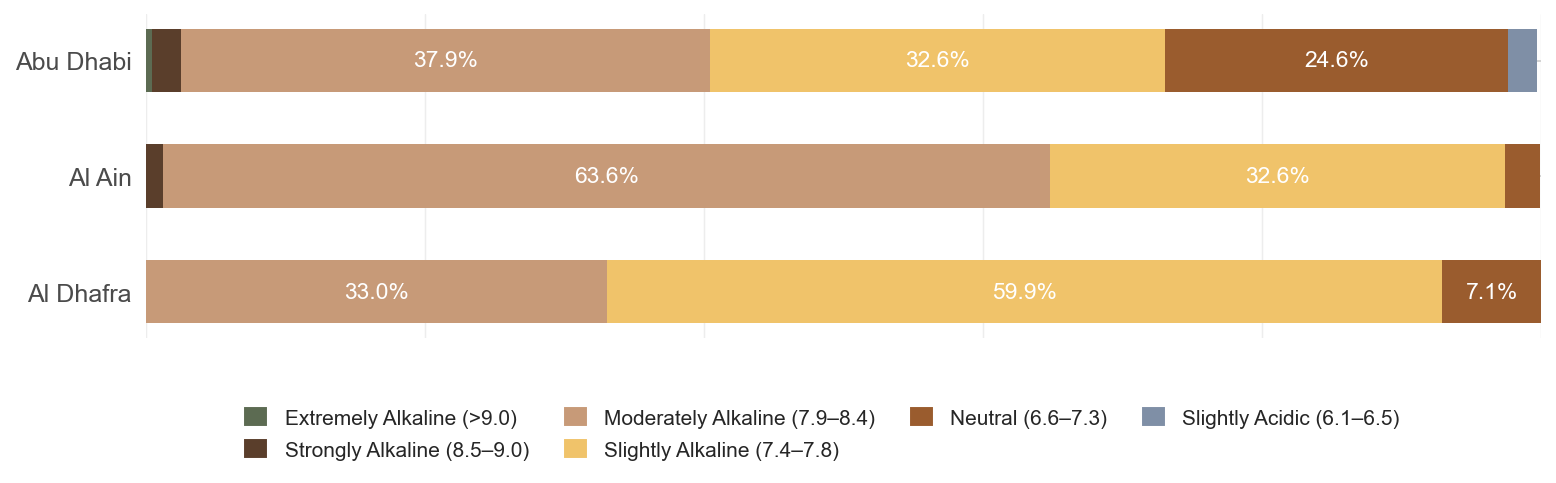

In [84]:
# 透视成宽表：行=Region，列=pH Class，值=Percentage (%)
pct_wide = (
    df_ph_class_pct["Percentage (%)"]
    .unstack("pH Class")
    .fillna(0.0)
)

# 确保地区顺序和你示例一致（上到下）
regions_order = ["Al Dhafra", "Al Ain", "Abu Dhabi"]
pct_wide = pct_wide.reindex(regions_order)
class_order = [
    "Extremely Alkaline (>9.0)",
    "Strongly Alkaline (8.5–9.0)",
    "Moderately Alkaline (7.9–8.4)",
    "Slightly Alkaline (7.4–7.8)",
    "Neutral (6.6–7.3)",
    "Slightly Acidic (6.1–6.5)",
]

# 颜色（接近你给的示例：深绿/深棕/棕褐/浅黄/棕/灰蓝/灰褐）
colors = {
    "Extremely Alkaline (>9.0)":    "#5C6B52",
    "Strongly Alkaline (8.5–9.0)":  "#5A3E2B",
    "Moderately Alkaline (7.9–8.4)": "#C79A78",
    "Slightly Alkaline (7.4–7.8)":  "#F0C36A",
    "Neutral (6.6–7.3)":            "#9A5C2E",
    "Slightly Acidic (6.1–6.5)":    "#7F8FA6",
}

# 按顺序补齐缺失列（避免某地区没有某类时报错）
for c in class_order:
    if c not in pct_wide.columns:
        pct_wide[c] = 0.0
pct_wide = pct_wide[class_order]

fig, ax = plt.subplots(figsize=(12, 3.6), dpi=150)

y = np.arange(pct_wide.shape[0])
left = np.zeros(pct_wide.shape[0])

# 控制哪些段显示文字（太小就不显示，避免挤）
label_min = 3.0  # %，你可以改成 2.0 或 4.0

for cls in class_order:
    vals = pct_wide[cls].to_numpy(dtype=float)

    ax.barh(
        y, vals,
        left=left,
        height=0.55,
        color=colors[cls],
        edgecolor="none"
    )

    # 段内标注
    for i, v in enumerate(vals):
        if v >= label_min:
            ax.text(
                left[i] + v / 2,
                y[i],
                f"{v:.1f}%",
                ha="center",
                va="center",
                fontsize=11,
                color="white"
            )

    left += vals

# y 轴标签（地区）
ax.set_yticks(y)
ax.set_yticklabels(pct_wide.index, fontsize=12, color="#4B4B4B")

# x 轴：0–100，并加竖向网格线
ax.set_xlim(0, 100)
ax.xaxis.grid(True, linestyle="-", linewidth=0.7, alpha=0.35)
ax.set_axisbelow(True)

# 隐藏 x 轴刻度标签（示例里基本不显示数字，只显示网格）
ax.tick_params(axis="x", labelbottom=False, length=0)

# 去掉多余边框
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# legend：底部两行
handles = [Patch(facecolor=colors[c], label=c) for c in class_order]
fig.subplots_adjust(bottom=0.28)

fig.legend(
    handles=handles,
    loc="lower center",
    bbox_to_anchor=(0.5, 0.02),
    ncol=4,              # 两行：7个项 -> 4+3 的布局更像示例
    frameon=False,
    fontsize=10,
    handlelength=1.2,
    handleheight=1.2,
    columnspacing=1.6
)

plt.show()
fig.savefig(os.path.join(OUT_DIR, "Ch06_pH_Categorisation.png"), bbox_inches="tight", pad_inches=0.1)
fig.savefig(os.path.join(OUT_DIR, "Ch06_pH_Categorisation.svg"), bbox_inches="tight", pad_inches=0.1)

# 1.4 Electrical Conductivity

In [85]:
land_use_types = {
    0: "All",
    7: "Agricultural",
    8: "Residential",
    9: "Industrial",
    11: "Non-developed",
}

regions = ["Abu Dhabi", "Al Ain", "Al Dhafra"]
year = "Soil quality data 2025"

df = data_dict[year]["PHChemical"].copy()

# Surface + 目标样品
df = df[(df["PHUID"] == 1) & (df["PHSampleUID"] == 1)]

# 只保留关心的地区（可选）
df = df[df["Location"].isin(regions)]

rows = []

# 循环每种土地类型
for land_id, land_name in land_use_types.items():

    if land_id == 0:
        df_land = df.copy()
    else:
        df_land = df[df["SurveyID"] == land_id]

    # 循环每个地区
    for region in regions:
        sub = df_land[df_land["Location"] == region]
        ec = sub["satec"].dropna()

        n = ec.size
        mean = ec.mean()
        median = ec.median()
        min_val = ec.min()
        max_val = ec.max()
        se = ec.std(ddof=1) / np.sqrt(n) if n > 1 else np.nan

        rows.append({
            "LandUse": land_name,
            "Region": region,
            "Mean ± se": f"{mean:.2f} ± {se:.2f}" if np.isfinite(mean) else "",
            "Median": round(median, 2) if np.isfinite(median) else np.nan,
            "Min": round(min_val, 2) if np.isfinite(min_val) else np.nan,
            "Max": round(max_val, 2) if np.isfinite(max_val) else np.nan,
            "n": int(n),
        })

df_ec_surface = (
    pd.DataFrame(rows)
      .set_index(["LandUse", "Region"])
      .loc[:, ["Mean ± se", "Median", "Min", "Max", "n"]]
)

df_ec_surface


Mean ± se  Median   Min    Max    n
LandUse       Region                                            
All           Abu Dhabi   64.04 ± 4.66   15.70  0.34  253.0  285
              Al Ain       9.89 ± 1.18    4.18  0.28  181.0  242
              Al Dhafra   21.22 ± 3.04    6.64  0.24  221.0  182
Agricultural  Abu Dhabi   15.24 ± 3.46    6.04  0.50  126.0   61
              Al Ain       9.92 ± 0.93    5.79  0.31   59.8  157
              Al Dhafra   19.52 ± 2.34   12.35  0.54  126.0   88
Residential   Abu Dhabi   23.48 ± 4.83    5.09  0.48  211.0   97
              Al Ain      10.26 ± 2.61    4.56  0.94   64.3   32
              Al Dhafra    9.46 ± 3.23    2.78  0.40   58.2   21
Industrial    Abu Dhabi  127.03 ± 7.29  139.00  1.56  253.0  111
              Al Ain       4.34 ± 1.34    2.30  0.62   40.2   33
              Al Dhafra  37.52 ± 13.46    4.60  2.45  221.0   25
Non-developed Abu Dhabi  59.01 ± 20.46    5.84  0.34  219.0   16
              Al Ain     18.20 ± 11.33    1.10  0.28  181.0   20
              Al Dhafra   21.00 ± 7.86    1.05  0.24  212.0   48

In [86]:
ec_bins = [
    (-float("inf"), 2.0,    "Non-Saline (<2 dS/m)"),
    (2.0, 4.0,             "Very Slightly Saline (2–4 dS/m)"),
    (4.0, 8.0,             "Slightly Saline (4–8 dS/m)"),
    (8.0, 16.0,            "Moderately Saline (8–16 dS/m)"),
    (16.0, float("inf"),   "Very Strongly Saline (>16 dS/m)"),
]

year = "Soil quality data 2025"
regions = ["Abu Dhabi", "Al Ain", "Al Dhafra"]

df = data_dict[year]["PHChemical"].copy()

# Surface 样品（与你前面所有分析保持一致）
df = df[(df["PHUID"] == 1) & (df["PHSampleUID"] == 1)]

# 确保 ec 是数值
df["satec"] = pd.to_numeric(df["satec"], errors="coerce")

rows = []

for region in regions:
    sub = df[df["Location"] == region]
    ec = sub["satec"].dropna()

    total_n = ec.shape[0]

    for low, high, label in ec_bins:
        if np.isinf(low):
            mask = ec < high
        elif np.isinf(high):
            mask = ec >= low
        else:
            mask = (ec >= low) & (ec < high)

        count = mask.sum()
        percent = count / total_n * 100 if total_n > 0 else np.nan

        rows.append({
            "Region": region,
            "ec Class": label,
            "Percentage (%)": round(percent, 1),
            "Count": int(count),
        })

df_ec_class_pct = pd.DataFrame(rows).set_index(["Region", "ec Class"])

df_ec_class_pct

Percentage (%)  Count
Region    ec Class                                              
Abu Dhabi Non-Saline (<2 dS/m)                       15.1     43
          Very Slightly Saline (2–4 dS/m)            14.7     42
          Slightly Saline (4–8 dS/m)                  9.1     26
          Moderately Saline (8–16 dS/m)              11.6     33
          Very Strongly Saline (>16 dS/m)            49.5    141
Al Ain    Non-Saline (<2 dS/m)                       31.8     77
          Very Slightly Saline (2–4 dS/m)            16.9     41
          Slightly Saline (4–8 dS/m)                 16.9     41
          Moderately Saline (8–16 dS/m)              18.2     44
          Very Strongly Saline (>16 dS/m)            16.1     39
Al Dhafra Non-Saline (<2 dS/m)                       23.1     42
          Very Slightly Saline (2–4 dS/m)            19.8     36
          Slightly Saline (4–8 dS/m)                 10.4     19
          Moderately Saline (8–16 dS/m)              16.5     30
          Very Strongly Saline (>16 dS/m)            30.2     55

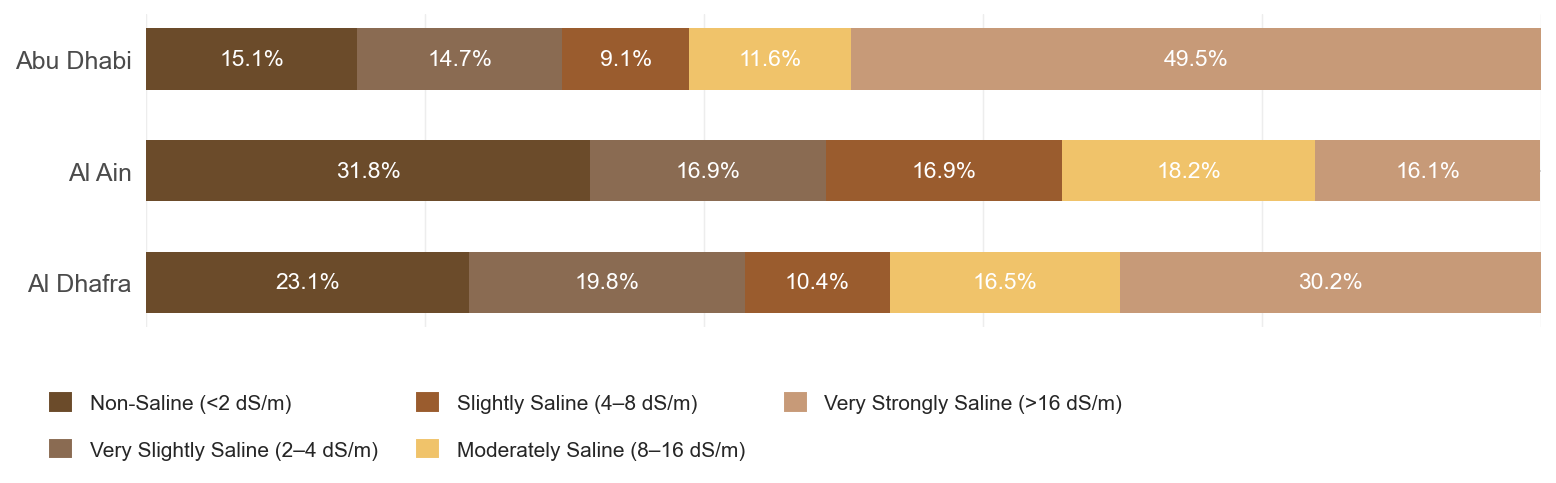

In [87]:

pct_wide = (
    df_ec_class_pct["Percentage (%)"]
    .unstack("ec Class")
    .fillna(0.0)
)

# 地区顺序（与示例一致：上到下）
regions_order = ["Al Dhafra", "Al Ain", "Abu Dhabi"]
pct_wide = pct_wide.reindex(regions_order)

# 类别顺序（与示例 legend 一致）
class_order = [
    "Non-Saline (<2 dS/m)",
    "Very Slightly Saline (2–4 dS/m)",
    "Slightly Saline (4–8 dS/m)",
    "Moderately Saline (8–16 dS/m)",
    "Very Strongly Saline (>16 dS/m)",
]

# 如果某些类别在数据里缺失，补 0
for c in class_order:
    if c not in pct_wide.columns:
        pct_wide[c] = 0.0
pct_wide = pct_wide[class_order]

# -------------------------
# 1) 配色（贴近示例）
# -------------------------
colors = {
    "Non-Saline (<2 dS/m)":              "#6B4B2A",  # 深棕
    "Very Slightly Saline (2–4 dS/m)":   "#8A6B52",  # 灰棕
    "Slightly Saline (4–8 dS/m)":        "#9A5C2E",  # 棕橙
    "Moderately Saline (8–16 dS/m)":     "#F0C36A",  # 浅黄
    "Very Strongly Saline (>16 dS/m)":   "#C79A78",  # 浅棕粉
}

# -------------------------
# 2) 百分比标签格式（整数不带小数）
# -------------------------
def fmt_pct(v: float) -> str:
    v1 = round(float(v), 1)
    if abs(v1 - round(v1)) < 1e-9:
        return f"{int(round(v1))}%"
    return f"{v1:.1f}%"

# -------------------------
# 3) 作图：横向堆叠百分比条形图
# -------------------------
fig, ax = plt.subplots(figsize=(12, 3.6), dpi=150)

y = np.arange(pct_wide.shape[0])
left = np.zeros(pct_wide.shape[0])

label_min = 4.5  # 太小的段不标注，避免挤（你示例里 ~6% 会标注；4.5 比较稳）

for cls in class_order:
    vals = pct_wide[cls].to_numpy(dtype=float)

    ax.barh(
        y, vals,
        left=left,
        height=0.55,
        color=colors[cls],
        edgecolor="none"
    )

    # 段内标注
    for i, v in enumerate(vals):
        if v >= label_min:
            ax.text(
                left[i] + v / 2,
                y[i],
                fmt_pct(v),
                ha="center",
                va="center",
                fontsize=11,
                color="white"
            )

    left += vals

# y 轴标签
ax.set_yticks(y)
ax.set_yticklabels(pct_wide.index, fontsize=12, color="#4B4B4B")

# x 轴 0-100，竖网格
ax.set_xlim(0, 100)
ax.xaxis.grid(True, linestyle="-", linewidth=0.7, alpha=0.35)
ax.set_axisbelow(True)

# 不显示 x 轴刻度数字（示例风格）
ax.tick_params(axis="x", labelbottom=False, length=0)

# 去边框
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# -------------------------
# 4) Legend：底部两行（上 3、下 2）
# -------------------------
handles = [Patch(facecolor=colors[c], label=c) for c in class_order]

fig.subplots_adjust(bottom=0.30)

fig.legend(
    handles=handles,
    loc="lower left",
    bbox_to_anchor=(0.06, 0.02),
    ncol=3,                 # 自动形成两行：3 + 2
    frameon=False,
    fontsize=10,
    handlelength=1.2,
    handleheight=1.2,
    columnspacing=1.8,
    labelspacing=1.2
)

plt.show()
fig.savefig(os.path.join(OUT_DIR, "Ch06_ECe_Categorisation.png"), bbox_inches="tight", pad_inches=0.1)
fig.savefig(os.path.join(OUT_DIR, "Ch06_ECe_Categorisation.svg"), bbox_inches="tight", pad_inches=0.1)

# 2 Soil Inorganic Contaminants

In [88]:
cocs_name_dict = {
    "Antimony": "Antimony",
    "Arsenic": "Arsenic",
    "Barium": "Barium",
    "Beryllium": "Beryllium",
    "Cadmium": "Cadmium",
    "Chromium": "Chromium_Total",
    "Cobalt": "Cobalt",
    "Copper": "Copper",
    "Lead": "Lead_aqua",
    "Manganese": "Manganese",
    "Mercury": "InorganicMercury",
    "Molybdenum": "Molybdenum",
    "Nickel": "Nickel_aqua",
    "Selenium": "Selenium_aqua",
    "Strontium": "Strontium",
    "Vanadium": "Vanadium",
    "Zinc": "Zinc",
}

regions = ["Abu Dhabi", "Al Ain", "Al Dhafra"]
# year = "Soil quality data 2025"
# df = data_dict[year]["PHChemical"].copy()
PHChemical_path = os.path.join(PROJECT_ROOT, 'Result_hmq/Soil quality data QC/Soil quality data QC 2025.xlsx')
df = pd.read_excel(PHChemical_path, sheet_name='Processed_Data')

# Surface + 目标样品
df = df[(df["PHUID"] == 1) & (df["PHSampleUID"] == 1)]

rows = []

for cocs_name, col_name in cocs_name_dict.items():

    # ---------- 各地区 ----------
    for region in regions:
        sub = df[df["Location"] == region]
        values = pd.to_numeric(sub[col_name], errors="coerce").dropna()

        rows.append({
            "Contaminant": cocs_name,
            "Region": region,
            "Mean": values.mean(),
            "n": int(values.size),
        })

    # ---------- Emirate（全域） ----------
    values_all = pd.to_numeric(df[col_name], errors="coerce").dropna()

    rows.append({
        "Contaminant": cocs_name,
        "Region": "Emirate",
        "Mean": values_all.mean(),
        "n": int(values_all.size),
    })

# 汇总成 DataFrame
df_cocs_mean = pd.DataFrame(rows)

# 调整成“元素 × 区域”的直观表格
df_cocs_mean_wide = (
    df_cocs_mean
    .pivot(index="Contaminant", columns="Region", values="Mean")
    .round(3)
)

df_cocs_mean_wide

Region,Abu Dhabi,Al Ain,Al Dhafra,Emirate
Contaminant,,,,
Antimony,0.200,0.147,0.098,0.155
Arsenic,2.023,1.678,1.449,1.757
Barium,36.797,21.409,21.606,27.593
Beryllium,0.091,0.133,0.103,0.108
Cadmium,0.130,0.111,0.058,0.105
Chromium,27.126,34.869,19.502,27.796
Cobalt,4.389,4.914,2.456,4.064
Copper,8.797,7.550,4.572,7.278
Lead,3.561,2.885,2.068,2.944


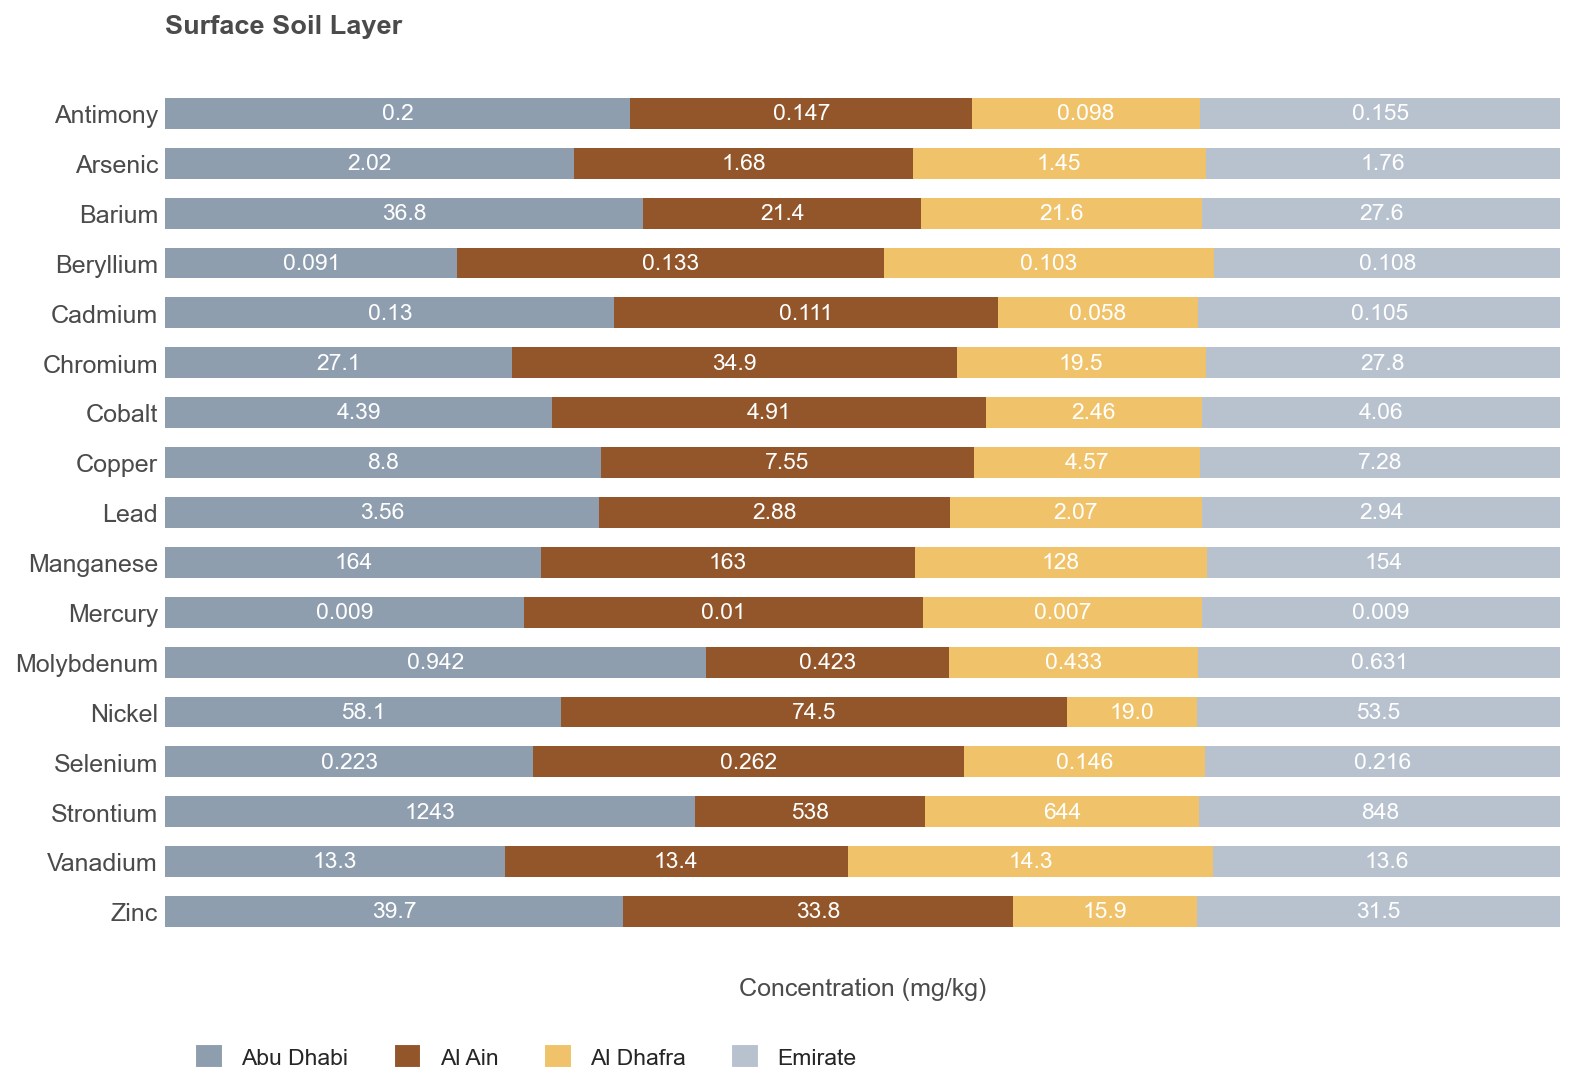

In [89]:
cols = ["Abu Dhabi", "Al Ain", "Al Dhafra", "Emirate"]

order = cocs_name_dict.keys()
plot_df = df_cocs_mean_wide.reindex(order)[cols].copy()

# ---------- 颜色（可按你年报主题再微调） ----------
colors = {
    "Abu Dhabi": "#8E9EAF",
    "Al Ain":    "#93562A",
    "Al Dhafra": "#F0C36A",
    "Emirate":   "#B8C2CE",
}

# ---------- 数值格式（显示原始均值） ----------
def fmt(v):
    if pd.isna(v):
        return ""
    v = float(v)
    if abs(v) >= 1000:
        return f"{v:.0f}"
    if abs(v) >= 100:
        return f"{v:.0f}"
    if abs(v) >= 10:
        return f"{v:.1f}"
    if abs(v) >= 1:
        return f"{v:.2f}".rstrip("0").rstrip(".")
    return f"{v:.3f}".rstrip("0").rstrip(".")

# ---------- 1) 行内归一化：每行总长=100 ----------
row_sum = plot_df.sum(axis=1)
width_df = plot_df.div(row_sum, axis=0) * 100
width_df = width_df.fillna(0.0)  # 避免全空行

# ---------- 2) 绘图 ----------
fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

y = np.arange(plot_df.shape[0])

label_min = 4.0  # 该段宽度小于这个百分比就不写字，避免挤（可调）

for i, elem in enumerate(plot_df.index):
    left = 0.0
    for region in cols:
        w = float(width_df.loc[elem, region])
        v = plot_df.loc[elem, region]

        # 画按比例宽度的色块
        ax.barh(
            y=i,
            width=w,
            left=left,
            height=0.62,
            color=colors[region],
            edgecolor="none"
        )

        # 色块内写原始均值（而不是百分比）
        if w >= label_min and pd.notna(v):
            ax.text(
                left + w/2,
                i,
                fmt(v),
                ha="center",
                va="center",
                fontsize=11,
                color="white"
            )

        left += w

# y 轴：元素名
ax.set_yticks(y)
ax.set_yticklabels(plot_df.index, fontsize=12, color="#4B4B4B")
ax.invert_yaxis()

# x 轴：总长一致（0-100），不显示刻度（像表格）
ax.set_xlim(0, 100)
ax.set_xticks([])
ax.tick_params(axis="y", length=0)

ax.set_xlabel("Concentration (mg/kg)", fontsize=12, color="#4B4B4B")

# 去掉边框
for s in ["top", "right", "left", "bottom"]:
    ax.spines[s].set_visible(False)

# 标题（左上）
ax.text(
    0.0, 1.02, "Surface Soil Layer",
    transform=ax.transAxes,
    ha="left", va="bottom",
    fontsize=13, fontweight="bold", color="#4B4B4B"
)

# legend（底部）
handles = [Patch(facecolor=colors[c], label=c) for c in cols]
fig.subplots_adjust(bottom=0.12)
fig.legend(
    handles=handles,
    loc="lower left",
    bbox_to_anchor=(0.13, 0.02),
    ncol=4,
    frameon=False,
    fontsize=11,
    handlelength=1.2,
    handleheight=1.2,
    columnspacing=2.0
)

plt.show()

# 导出高清
# plt.savefig("Surface_COCs_mean_share_by_region.png", dpi=600, bbox_inches="tight")
# plt.savefig("Surface_COCs_mean_share_by_region.svg", bbox_inches="tight")
fig.savefig(os.path.join(OUT_DIR, "Ch06_MeanHeavyMetals.png"), bbox_inches="tight", pad_inches=0.1)
fig.savefig(os.path.join(OUT_DIR, "Ch06_MeanHeavyMetals.svg"), bbox_inches="tight", pad_inches=0.1)


In [90]:
sub_land_use_dict = {key: land_use_types[key] for key in [7, 8, 9] if key in land_use_types}
threshold = {
    "Agricultural": {
        "Antimony": 20,
        "Arsenic": 12,
        "Barium": 750,
        "Beryllium": 4,
        "Cadmium": 1.4,
        "Chromium_Total": 64,
        "Cobalt": 40,
        "Copper": 63,
        "Lead_aqua": 70,
        "InorganicMercury": 6.6,
        "Molybdenum": 5,
        "Nickel_aqua": 45,
        "Selenium_aqua": 1,
        "Vanadium": 130,
        "Zinc": 250
    },
    "Residential": {
        "Antimony": 3.1,
        "Arsenic": 0.68,
        "Barium": 1500,
        "Beryllium": 16,
        "Cadmium": 0.71,
        "Chromium_Total": 30.9,
        "Cobalt": 2.3,
        "Copper": 310,
        "Lead_aqua": 200,
        "InorganicMercury": 0.71,
        "Molybdenum": 39,
        "Manganese": 180,
        "Nickel_aqua": 140,
        "Selenium_aqua": 39,
        "Vanadium": 39,
        "Zinc": 2300
    },
    "Industrial": {
        "Antimony": 47,
        "Arsenic": 3,
        "Barium": 22000,
        "Beryllium": 230,
        "Cadmium": 10,
        "Chromium_Total": 30.9,
        "Cobalt": 35,
        "Copper": 4700,
        "Lead_aqua": 800,
        "InorganicMercury": 3,
        "Molybdenum": 580,
        "Manganese": 2600,
        "Nickel_aqua": 1700,
        "Selenium_aqua": 580,
        "Vanadium": 580,
        "Zinc": 35000
    },
}
abl = {
    "Antimony": 0.16,
    "Arsenic": 1.79,
    "Barium": 28.6,
    "Beryllium": 0.11,
    "Cadmium": 0.11,
    "Chromium_Total": 28.8,
    "Cobalt": 4.24,
    "Copper": 7.65,
    "Lead_aqua": 3.11,
    "InorganicMercury": 0.01,
    "Molybdenum": 0.68,
    "Manganese": 157,
    "Nickel_aqua": 57,
    "Selenium_aqua": 0.23,
    "Vanadium": 13.8,
    "Zinc": 33.8
}

results = []

for element in abl.keys():
    abl_value = abl[element]

    # =========================================================
    # 1) 在“每个 element 的小循环”里拿到 3 个 ssl_value（可能缺失）
    # =========================================================
    ssl_values = {}
    for survey_id, land_use in sub_land_use_dict.items():
        ssl_values[land_use] = None
        if land_use in threshold and element in threshold[land_use]:
            ssl_values[land_use] = threshold[land_use][element]

    # =========================================================
    # 2) 分别为 3 个 land use 计算最终阈值 + exceed
    # =========================================================
    for survey_id, land_use in sub_land_use_dict.items():
        ssl_value = ssl_values[land_use]

        # ---- 最终阈值：取 max(SSL, ABL)，若无 SSL 则用 ABL ----
        if ssl_value is None:
            final_threshold = abl_value
            threshold_source = "ABL (no SSL)"
        else:
            final_threshold = max(ssl_value, abl_value)
            threshold_source = "SSL" if ssl_value >= abl_value else "ABL"

        # ---- df 中没有该元素列：记录并跳过 ----
        if element not in df.columns:
            results.append({
                "Element": element,
                "SurveyID": survey_id,
                "LandUse": land_use,
                "ABL": abl_value,
                "SSL": ssl_value,
                "FinalThreshold": final_threshold,
                "ThresholdSource": threshold_source,
                "N": 0,
                "N_Exceed": 0,
                "ExceedPct": np.nan
            })
            continue

        # ---- 过滤该 land use 的数据，并按该元素非空计数 ----
        df_sub = df[df["SurveyID"] == survey_id].dropna(subset=[element])
        n_total = df_sub.shape[0]

        if n_total == 0:
            results.append({
                "Element": element,
                "SurveyID": survey_id,
                "LandUse": land_use,
                "ABL": abl_value,
                "SSL": ssl_value,
                "FinalThreshold": final_threshold,
                "ThresholdSource": threshold_source,
                "N": 0,
                "N_Exceed": 0,
                "ExceedPct": np.nan
            })
            continue

        # ---- exceed 计算（逐类分别算）----
        n_exceed = (df_sub[element] > final_threshold).sum()
        exceed_pct = n_exceed / n_total

        results.append({
            "Element": element,
            "SurveyID": survey_id,
            "LandUse": land_use,
            "ABL": abl_value,
            "SSL": ssl_value,
            "FinalThreshold": final_threshold,
            "ThresholdSource": threshold_source,
            "N": n_total,
            "N_Exceed": int(n_exceed),
            "ExceedPct": exceed_pct
        })

result_df = pd.DataFrame(results)
# 先把 exceed_pct 变成百分比（如果你希望是 0-1，就注释掉这一行）
result_df["ExceedPct"] = result_df["ExceedPct"] * 100

# =========================================================
# 1) 你要的宽表：index=Element, columns=三种类型(百分比)
# =========================================================
exceed_wide = (
    result_df.pivot_table(
        index="Element",
        columns="LandUse",
        values="ExceedPct",
        aggfunc="first"   # 每个 Element+LandUse 理论上只有一条，first 就够
    )
    .reindex(columns=["Agricultural", "Residential", "Industrial"])
)

# 可选：更好看（保留两位小数）
exceed_wide = exceed_wide.round(2)

exceed_wide

LandUse,Agricultural,Residential,Industrial
Element,,,
Antimony,0.00,0.00,0.00
Arsenic,0.00,28.67,9.70
Barium,0.00,0.00,0.00
Beryllium,0.00,0.00,0.00
Cadmium,0.00,0.00,0.00
Chromium_Total,3.62,22.82,40.96
Cobalt,0.00,25.68,0.00
Copper,0.00,0.00,0.00
InorganicMercury,0.00,0.00,0.00
